# Variation in Blocking Probability with Different Aggregation Levels (ALs)



* In this notebook, we simulate the `blocking probability` as a function of different `ALs`.
* We consider 5 scenarios corresponding to each AL supported for USS. In each scenario only one of the AL is used the probability of 1. 
* For instance [1, 0, 0, 0, 0] distribution is used to evaluate the blocking probability when AL 1 is chosen.
* Intuitively we see that a higher AL provides a better coverage but at the cost of using more CCEs and hence higher   blocking probabilty.

______________________________________________________________________________________________________________
* We consider 5 scenarios corresponding to each Aggregation Level (AL) of interest and the distributions are as follows:


    * AL 1 distribution :  [1, 0, 0, 0, 0] 
    * AL 2 distribution :  [0, 1, 0, 0, 0] 
    * AL 4 distribution :  [0, 0, 1, 0, 0] 
    * AL 8 distribution :  [0, 0, 0, 1, 0] 
    * AL 16 distribution : [0, 0, 0, 0, 1]
    
    
* The CORESET size `Nccep` is 54 CCEs for this simulation.



## Python Libraries

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# %matplotlib widget
import matplotlib.pyplot  as plt
import matplotlib.patches as mpatches
import matplotlib as mpl

import numpy      as np

## 5G-Toolkit Libraries

In [2]:
import sys
sys.path.append("../../")
from toolkit5G.Scheduler import PDCCHScheduler

## Simulation Parameters
The following parameters are used for this simulation:
- `coresetID` denotes the coreset ID.
- `slotNumber` denotes the slot-number carrying the PDCCH.
- `searchSpaceType` denotes the search space type. UE specific search space (USS) or Common search space (CSS).
- `nci` denotes the variable corresponding to carrier aggregation. Current simulation does not assume carrier aggregation.

In [3]:

mu                = np.random.randint(4)    # numerlogy for sub-carrier spacing
numSlotsPerFrame  = 2**mu * 10              # number of slots per radio frame
coresetID         = 1                       # coreset ID
slotNumber        = 0                       # slot number
searchSpaceType   = "USS"                   # search space type. UE specific search space
nci               = 0                       # variable corresponding to carrier aggregation
numIterations     = 1000                    # Number of Iterations considered in simulation


## PDCCH Scheduling Parameters
Following parameters are crucial for PDCCH scheduling performance:
- ``Nccep`` denotes coreset size or number of CCEs available for scheduling UEs.
- ``strategy`` denotes the scheduling strategy.
- ``numCandidates`` denotes number of PDCCH candidates per each Aggregation Level.

In [4]:

Nccep             = 54                                         # coreset size in terms of CCEs 
maxNumUEs         = 60
numUEs            = np.arange(0,maxNumUEs+1,4)                 # UE range considered in simulation
numUEs[0]         = 1
numCandidates     = np.array([6,6,4,2,1], dtype=int)           # number of PDCCH candidates per AL
strategy          = "Conservative"                             # scheduling strategy 
pdcchSchedulerObj = PDCCHScheduler(mu,slotNumber,coresetID,nci)


####  Impact of AL 1

* In this case the Base Station (BS) only configures 6 candidates (of AL 1) for each UE to monitor and other ALs are not monitored. 


In [5]:
########
# AL1
########
aggLevelProbDistributionForAL1 = np.array([1, 0.0, 0.0, 0.0, 0.0])
probOfBlockingForAL1 = np.zeros(numUEs.shape)

for n in range(numUEs.size):
    print("Simulating (n,numUEs) : "+str(n)+", "+str(numUEs[n]))
    prob      = 0
    for i in range(numIterations):
        ueALdistribution  = np.random.multinomial(numUEs[n], aggLevelProbDistributionForAL1)
        rnti              = np.random.choice( np.arange(1,65519+1), size = (numUEs[n],), replace=False)
        count             = pdcchSchedulerObj(Nccep,searchSpaceType,ueALdistribution,numCandidates,rnti,strategy)[0]
        numBlockedUEs     = np.sum(count)
        prob              = prob + numBlockedUEs/numUEs[n]
    probOfBlockingForAL1[n] = prob/numIterations

Simulating (n,numUEs) : 0, 1
Simulating (n,numUEs) : 1, 4
Simulating (n,numUEs) : 2, 8
Simulating (n,numUEs) : 3, 12
Simulating (n,numUEs) : 4, 16
Simulating (n,numUEs) : 5, 20
Simulating (n,numUEs) : 6, 24
Simulating (n,numUEs) : 7, 28
Simulating (n,numUEs) : 8, 32
Simulating (n,numUEs) : 9, 36
Simulating (n,numUEs) : 10, 40
Simulating (n,numUEs) : 11, 44
Simulating (n,numUEs) : 12, 48
Simulating (n,numUEs) : 13, 52
Simulating (n,numUEs) : 14, 56
Simulating (n,numUEs) : 15, 60


####  Impact of AL 2

* In this case the BS only configures 6 candidates (of AL 2) for each UE to monitor and other ALs are not monitored. 


In [6]:
########
# AL2
########
aggLevelProbDistributionForAL2 = np.array([0.0, 1, 0.0, 0.0, 0.0])

probOfBlockingForAL2 = np.zeros(numUEs.shape)

for n in range(numUEs.size):
    print("Simulating (n,numUEs) : "+str(n)+", "+str(numUEs[n]))
    prob      = 0
    for i in range(numIterations):
        ueALdistribution  = np.random.multinomial(numUEs[n], aggLevelProbDistributionForAL2)
        rnti              = np.random.choice( np.arange(1,65519+1), size = (numUEs[n],), replace=False)
        count             = pdcchSchedulerObj(Nccep,searchSpaceType,ueALdistribution,numCandidates,rnti,strategy)[0]
        numBlockedUEs     = np.sum(count)
        prob              = prob + numBlockedUEs/numUEs[n]
    probOfBlockingForAL2[n] = prob/numIterations 

Simulating (n,numUEs) : 0, 1
Simulating (n,numUEs) : 1, 4
Simulating (n,numUEs) : 2, 8
Simulating (n,numUEs) : 3, 12
Simulating (n,numUEs) : 4, 16
Simulating (n,numUEs) : 5, 20
Simulating (n,numUEs) : 6, 24
Simulating (n,numUEs) : 7, 28
Simulating (n,numUEs) : 8, 32
Simulating (n,numUEs) : 9, 36
Simulating (n,numUEs) : 10, 40
Simulating (n,numUEs) : 11, 44
Simulating (n,numUEs) : 12, 48
Simulating (n,numUEs) : 13, 52
Simulating (n,numUEs) : 14, 56
Simulating (n,numUEs) : 15, 60


####  Impact of AL 4

* In this case the BS only configures 4 candidates (of AL 4) for each UE to monitor and other ALs are not monitored. 


In [7]:
########
# AL4
########
aggLevelProbDistributionForAL4 = np.array([0.0, 0.0, 1, 0.0, 0.0])

probOfBlockingForAL4 = np.zeros(numUEs.shape)

for n in range(numUEs.size):
    print("Simulating (n,numUEs) : "+str(n)+", "+str(numUEs[n]))
    prob      = 0
    for i in range(numIterations):
        ueALdistribution  = np.random.multinomial(numUEs[n], aggLevelProbDistributionForAL4)
        rnti              = np.random.choice( np.arange(1,65519+1), size = (numUEs[n],), replace=False)
        count             = pdcchSchedulerObj(Nccep,searchSpaceType,ueALdistribution,numCandidates,rnti,strategy)[0]
        numBlockedUEs     = np.sum(count)
        prob              = prob + numBlockedUEs/numUEs[n]
    probOfBlockingForAL4[n] = prob/numIterations

Simulating (n,numUEs) : 0, 1
Simulating (n,numUEs) : 1, 4
Simulating (n,numUEs) : 2, 8
Simulating (n,numUEs) : 3, 12
Simulating (n,numUEs) : 4, 16
Simulating (n,numUEs) : 5, 20
Simulating (n,numUEs) : 6, 24
Simulating (n,numUEs) : 7, 28
Simulating (n,numUEs) : 8, 32
Simulating (n,numUEs) : 9, 36
Simulating (n,numUEs) : 10, 40
Simulating (n,numUEs) : 11, 44
Simulating (n,numUEs) : 12, 48
Simulating (n,numUEs) : 13, 52
Simulating (n,numUEs) : 14, 56
Simulating (n,numUEs) : 15, 60


####  Impact of AL 8

* In this case the BS only configures 2 candidates (of AL 8) for each UE to monitor and other ALs are not monitored. 


In [8]:
########
# AL8
########
aggLevelProbDistributionForAL8 = np.array([0.0, 0.0, 0.0, 1, 0.0])

probOfBlockingForAL8 = np.zeros(numUEs.shape)

for n in range(numUEs.size):
    print("Simulating (n,numUEs) : "+str(n)+", "+str(numUEs[n]))
    prob      = 0
    for i in range(numIterations):
        ueALdistribution  = np.random.multinomial(numUEs[n], aggLevelProbDistributionForAL8)
        rnti              = np.random.choice( np.arange(1,65519+1), size = (numUEs[n],), replace=False)
        count             = pdcchSchedulerObj(Nccep,searchSpaceType,ueALdistribution,numCandidates,rnti,strategy)[0]
        numBlockedUEs     = np.sum(count)
        prob              = prob + numBlockedUEs/numUEs[n]
    probOfBlockingForAL8[n] = prob/numIterations

Simulating (n,numUEs) : 0, 1
Simulating (n,numUEs) : 1, 4
Simulating (n,numUEs) : 2, 8
Simulating (n,numUEs) : 3, 12
Simulating (n,numUEs) : 4, 16
Simulating (n,numUEs) : 5, 20
Simulating (n,numUEs) : 6, 24
Simulating (n,numUEs) : 7, 28
Simulating (n,numUEs) : 8, 32
Simulating (n,numUEs) : 9, 36
Simulating (n,numUEs) : 10, 40
Simulating (n,numUEs) : 11, 44
Simulating (n,numUEs) : 12, 48
Simulating (n,numUEs) : 13, 52
Simulating (n,numUEs) : 14, 56
Simulating (n,numUEs) : 15, 60


####  Impact of AL 16

* In this case the BS only configures 1 candidate (of AL 16) for each UE to monitor and other ALs are not monitored. 


In [9]:
########
# AL16
########
aggLevelProbDistributionForAL16 = np.array([0.0, 0.0, 0.0, 0.0, 1])

probOfBlockingForAL16 = np.zeros(numUEs.shape)

for n in range(numUEs.size):
    print("Simulating (n,numUEs) : "+str(n)+", "+str(numUEs[n]))
    prob      = 0
    for i in range(numIterations):
        ueALdistribution  = np.random.multinomial(numUEs[n], aggLevelProbDistributionForAL16)
        rnti              = np.random.choice( np.arange(1,65519+1), size = (numUEs[n],), replace=False)
        count             = pdcchSchedulerObj(Nccep,searchSpaceType,ueALdistribution,numCandidates,rnti,strategy)[0]
        numBlockedUEs     = np.sum(count)
        prob              = prob + numBlockedUEs/numUEs[n]
    probOfBlockingForAL16[n] = prob/numIterations 

Simulating (n,numUEs) : 0, 1
Simulating (n,numUEs) : 1, 4
Simulating (n,numUEs) : 2, 8
Simulating (n,numUEs) : 3, 12
Simulating (n,numUEs) : 4, 16
Simulating (n,numUEs) : 5, 20
Simulating (n,numUEs) : 6, 24
Simulating (n,numUEs) : 7, 28
Simulating (n,numUEs) : 8, 32
Simulating (n,numUEs) : 9, 36
Simulating (n,numUEs) : 10, 40
Simulating (n,numUEs) : 11, 44
Simulating (n,numUEs) : 12, 48
Simulating (n,numUEs) : 13, 52
Simulating (n,numUEs) : 14, 56
Simulating (n,numUEs) : 15, 60


## Plot the Variation in Blocking Probability with number of UEs for different Aggregation levels.

* Its the recreation of ``Fig. 7: Blocking probability for different ALs (CORESET size = 54 CCEs)``from the           reference   paper referenced below [1].

* From the figure we see that using a higher AL leads to higher blocking probability.

* The results in figure shows that to maintain the blocking probability `below 0.2`, the maximum possible number of UEs to be scheduled with ALs 2, 4, 8, and 16 is close to 33, 16, 6, and 2 respectively.

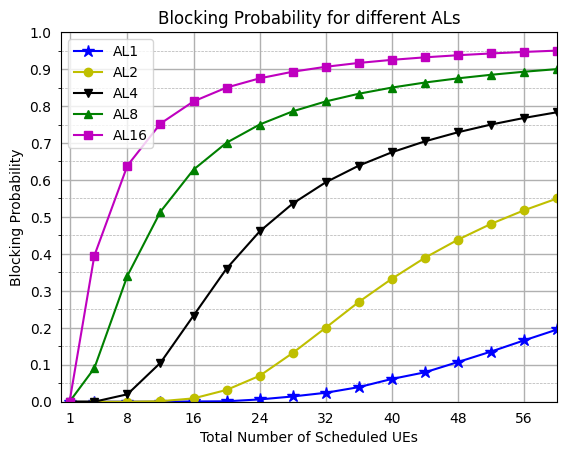

In [10]:
fig, ax = plt.subplots()

ax.plot(numUEs, probOfBlockingForAL1,  marker  = "*", linestyle = "solid", ms = 9, c = 'b', label = "AL1")
ax.plot(numUEs, probOfBlockingForAL2,  marker  = "o", linestyle = "solid", ms = 6, c = 'y', label = "AL2")
ax.plot(numUEs, probOfBlockingForAL4,  marker  = "v", linestyle = "solid", ms = 6, c = 'k', label = "AL4")
ax.plot(numUEs, probOfBlockingForAL8,  marker  = "^", linestyle = "solid", ms = 6, c = 'g', label = "AL8")
ax.plot(numUEs, probOfBlockingForAL16, marker  = "s", linestyle = "solid", ms = 6, c = 'm', label = "AL16")
ax.legend()

ax.set_xlabel('Total Number of Scheduled UEs')
ax.set_ylabel('Blocking Probability')
ax.set_title('Blocking Probability for different ALs', fontsize=12) 
ax.set_xticks(numUEs[0:-1:2])
ax.set_yticks(np.linspace(0.05,0.95,10), minor=True)
ax.set_yticks(np.linspace(0,   1,11), minor=False)
ax.tick_params(axis='both',which='major', grid_linewidth=1, width=0)
ax.tick_params(axis='both',which='minor', grid_linewidth=0.5, grid_linestyle = '--')    
ax.set_ylim([0, 1])
ax.set_xlim([0, numUEs[-1]])

ax.grid(which='both')
plt.show()

## References

[1] `Blocking Probability Analysis for 5G New Radio (NR) Physical Downlink Control Channel`. Mohammad Mozaffari,
      Y.-P. Eric Wang, and Kittipong Kittichokechai